In [1]:
import numpy as np
import ujson
import bz2
import numpy as np
import pprint
import glob

First, load a json file. One json file usually contains several hundreds events. It has a tree structure and contains all the useful information about the events. Usually we view the 'RawHits' part as our input and 'TruthHits' part as ground truth information (which is only available at the training stage using the simulation data).

In [55]:
# filename = 'json_sample/background_sample_HFMLD0_6584382.json'
# filename = 'json_sample/background_sample_HFMLD0_283957.json'
# filename = 'json_sample/signal_sample_HFMLD0_280248.json'
# filename = 'testInterface_00000.json'
# event_index = 8

# DATA_DIR = '/disks/disk2/zhaozhongshi/HFMLNewFiles/Signal'

DATA_DIR = '/disks/disk1/tingtingxuan/HFMLNewFiles-old/Signal'
data_dir = sorted(glob.glob(DATA_DIR + '/*.json'))

In [56]:
filename = data_dir[3]
event_index = 1

In [4]:
# filename = '../temp/Test3.json'
# event_index = 1

In [57]:
with open(filename,'rb') as z:
    raw_data = ujson.loads(z.read())

## Basic check

In [6]:
print(raw_data.keys())
# raw_data['Events'] is a list.
print('Total Number of Events in this file: ', len(raw_data['Events']))

event = raw_data['Events'][event_index]

print(event.keys())

print(event['MetaData'].keys())
print(event['TruthTriggerFlag'].keys())
print(event['RawHit'].keys())
print(event['TruthHit'].keys())


dict_keys(['Events'])
Total Number of Events in this file:  411
dict_keys(['MetaData', 'TruthTriggerFlag', 'RawHit', 'TruthHit'])
dict_keys(['Description', 'EventID', 'Unit', 'CollisionVertex', 'Layer_Count', 'PixelHalfLayerIndex_Count', 'Layer0', 'Layer1', 'Layer2'])
dict_keys(['Description', 'Flags'])
dict_keys(['Description', 'MVTXHits', 'INTTHITS'])
dict_keys(['Description', 'TruthTracks'])


In [7]:
# check the MetaData
pprint.pprint(event['MetaData'])

{'CollisionVertex': [-0.0016565554452644107,
                     -0.013618834322999264,
                     3.9518747235182623],
 'Description': 'These are meta data for this event. Not intended to use in ML '
                'algorithm',
 'EventID': 1,
 'Layer0': {'Chip_Count': 9,
            'HalfLayer_Count': 2,
            'PixelPhiIndexInHalfLayer_Count': 3072,
            'PixelPhiIndexInLayer_Count': 6144,
            'PixelZIndex_Count': 9216,
            'Pixel_Count': 524288,
            'Stave_Count': 12},
 'Layer1': {'Chip_Count': 9,
            'HalfLayer_Count': 2,
            'PixelPhiIndexInHalfLayer_Count': 4096,
            'PixelPhiIndexInLayer_Count': 8192,
            'PixelZIndex_Count': 9216,
            'Pixel_Count': 524288,
            'Stave_Count': 16},
 'Layer2': {'Chip_Count': 9,
            'HalfLayer_Count': 2,
            'PixelPhiIndexInHalfLayer_Count': 5120,
            'PixelPhiIndexInLayer_Count': 10240,
            'PixelZIndex_Count': 9216,
   

In [8]:
# check the flag
event['TruthTriggerFlag']

{'Description': 'These are categorical true/false MonteCalo truth tags for the event. These are only known in training sample. This would be trigger output in real data processing.',
 'Flags': {'D0toPiKInAcceptance': True}}

In [9]:
# check the MVTX hits
MVTXHits = event['RawHit']['MVTXHits']
print('Total number of MVTXHits in this event: ', len(MVTXHits))

# One example of the MVTXHits
pprint.pprint(MVTXHits[-1])

Total number of MVTXHits in this event:  249
{'Coordinate': [4.1069759414220215, -0.6249057498906876, 8.640026016235351],
 'ID': {'Chip': 7,
        'G4HitAssoc': [8589934602],
        'HitSequenceInEvent': 248,
        'Layer': 2,
        'MVTXTrkID': 32,
        'Pixel_x': 282,
        'Pixel_z': 373,
        'Stave': 19}}


In [10]:
# check the INTT hits
INTTHits = event['RawHit']['INTTHITS']
print('Total number of INTTHits in this event: ', len(INTTHits))

# One example of the INTTHits
pprint.pprint(INTTHits[0])

Total number of INTTHits in this event:  65
{'Coordinate': [7.184399999999999, 0.8853, -12.100000000000001],
 'ID': {'Col': 0,
        'G4HitAssoc': [12884901889],
        'HitSequenceInEvent': 0,
        'INTTTrkID': 1,
        'LadderPhiId': 0,
        'LadderZId': 0,
        'Layer': 3,
        'Row': 241}}


In [11]:
# check the ground truth tracks
tracks = event['TruthHit']['TruthTracks']
print('Total number of tracks in this event: ', len(tracks))

# One example track
pprint.pprint(tracks[1])
print(list(tracks[0].keys()))

# Total number of tracks in this event:  40
# {'HitInTruthTrack': [[3, 17179869199]],
#  'INTTHitID': [[38, 39]],
#  'MVTXHitID': [[]],
#  'OriginVertexPoint': [1.9360662829661301,
#                        -7.632435449137988,
#                        -7.171295102031555],
#  'ParentTypeID': 84,
#  'ParticleTypeID': 11,
#  'TrackEnergy': 0.0022603172965530893,
#  'TrackID': -398,
#  'TrackMomentum': [0.0005493387546818833,
#                    -0.0004200099102173381,
#                    -0.002090390634068106],
#  'TrackSequenceInEvent': -398}

Total number of tracks in this event:  18
{'HitInTruthTrack': [[0, 4294967301],
                     [1, 8589934598],
                     [3, 17179869188],
                     [4, 25769803778]],
 'INTTHitID': [[31, 32, 55, 56]],
 'MVTXHitID': [[121, 122, 123, 124, 125, 126, 127, 204, 205, 206, 207]],
 'OriginVertexPoint': [-3.258592494472712,
                       0.6773496180769791,
                       -0.44880997516585985],
 'ParticleTypeID': 11,
 'TrackEnergy': 0.16545804768457914,
 'TrackID': -99,
 'TrackMomentum': [-0.09838558543598291,
                   0.020651453748174863,
                   -0.13141498567595836],
 'TrackSequenceInEvent': -99}
['OriginVertexPoint', 'TrackSequenceInEvent', 'HitInTruthTrack', 'TrackID', 'MVTXHitID', 'INTTHitID', 'ParticleTypeID', 'TrackMomentum', 'TrackEnergy']


Here, we can use the MVTXHitID and INTTHitID to find the corresponding hits on this track.

We can calculate pt = sqrt(momentum_x^2 + momentum_y^2) which is one of the important physics feature.


ParticleTypeID can be found in this link: https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf

In [12]:
for event in raw_data['Events']:
    tracks = event['TruthHit']['TruthTracks']
    for track in tracks:
        if abs(track['ParentTypeID']) == 411:
            print(track['TrackID'], track['ParentTypeID'])

KeyError: 'ParentTypeID'

# Check noise hits

In [13]:
for file in data_dir[:10]:
    with open(file,'rb') as z:
        raw_data = ujson.loads(z.read())
    
    for event in raw_data['Events']:
        MVTXHits = event['RawHit']['MVTXHits']
        MVTXHits_dict = {}
        for hit in MVTXHits:
            id = MVTXHits_dict['ID']['HitSequenceInEvent']
            MVTXHits_dict[id] = -99999
        INTTHits = event['RawHit']['INTTHITS']
        INTTHits_dict = {}
        for hit in MVTXHits:
            id = MVTXHits_dict['ID']['HitSequenceInEvent']
            MVTXHits_dict[id] = -99999
        tracks = event['TruthHit']['TruthTracks']
        for track in tracks:


SyntaxError: unexpected EOF while parsing (205712159.py, line 17)

## Visualization

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [58]:
event = raw_data['Events'][5]
MVTXHits = event['RawHit']['MVTXHits']
INTTHits = event['RawHit']['INTTHITS']
tracks = event['TruthHit']['TruthTracks']

[  -1.   -1.   -1.   -1.   -1.   -1.   -1.   72.   72.   72.   72.   72.
    2.    2.    2.   -1.   -1.   -1.   -1. -526. -526. -526. -526. -526.
 -526.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   87.   87.   87.   87.
   85.   85.   85.   85.   85.   85.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   45.   45.   45.
   45.   74.   74.   74.   74.   73.   73.   73.   73.   -1.   -1.   -1.
   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   80.   80.   80.   -1.
   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   75.   75.   75.   75.   49.   49.   49.   49.   -1.   -1.   61.
   61.   61.   61.   48.   48.   48.   48.   67.   67.   -1.   -1.   -1.
   -1.   -1.   -1.   -1.    1.    1.   47.   47.   47.   47.   47.   30.
   30.   30.   30.   30.   30.   76.   76.   65.   65.   65.   56.   56.
   69.   69.   79.   79.   79.   57.   57.   57.   

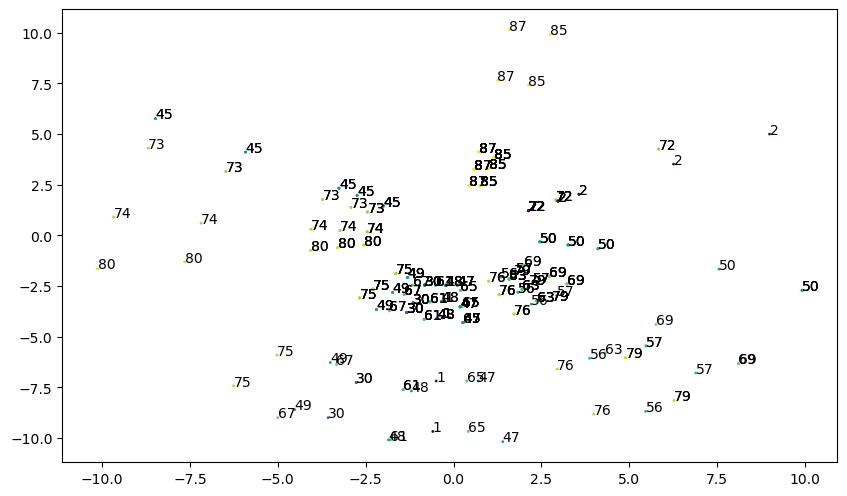

In [60]:
hits = []
track_id = []
for hit in MVTXHits:
    hits.append(hit['Coordinate'])
for hit in INTTHits:
    hits.append(hit['Coordinate'])
hits = np.array(hits)

mvtx_track_id = (-1) * np.ones(len(MVTXHits))
intt_track_id = (-1) * np.ones(len(INTTHits))
for track in tracks:
    # track['MVTXHitID'][0] = [i for i in track['MVTXHitID'][0] if i < len(MVTXHits)]
    # track['INTTHitID'][0] = [i for i in track['INTTHitID'][0] if i < len(INTTHits)]
    mvtx_track_id[track['MVTXHitID'][0]] = track['TrackID']
    intt_track_id[track['INTTHitID'][0]] = track['TrackID']
print(mvtx_track_id, intt_track_id)

track_id = np.concatenate([mvtx_track_id, intt_track_id])    

mask = track_id > 0
hits = hits[mask]
track_id = track_id[mask]

figure(figsize=(10, 6), dpi=100)
plt.scatter(hits[:, 0], hits[:, 1], s=1, c=track_id)
for i in range(hits.shape[0]):
    plt.annotate(int(track_id[i]), (hits[i, 0], hits[i, 1]))

### Track Angle Analysis

In [19]:
from itertools import permutations, combinations
import numpy as np
import glob
import ujson
import matplotlib.pyplot as plt

In [15]:
def check_edge_candidate_threshold(event):
    MVTXHits = event['RawHit']['MVTXHits']
    INTTHits = event['RawHit']['INTTHITS']
    tracks = event['TruthHit']['TruthTracks']
    hits = []
    layer_id = []
    for hit in MVTXHits:
        hits.append(hit['Coordinate'])
        layer_id.append(hit['ID']['Layer'])
    for hit in INTTHits:
        hits.append(hit['Coordinate'])
        layer_id.append(hit['ID']['Layer'])
    hits = np.array(hits).reshape(-1, 3)
    layer_id = np.array(layer_id)
    
    if len(hits) <= 1:
        print('empty event')
        return [], []

    # add phi and r
    r = np.sqrt(hits[:, 0]**2 + hits[:, 1]**2)
    phi = np.arctan2(hits[:, 0], hits[:, 1])

    # by doing this, we can mark the noise as -1.
    mvtx_track_id = (-1) * np.ones(len(MVTXHits))
    intt_track_id = (-1) * np.ones(len(INTTHits))
    for track in tracks:
        mvtx_track_id[track['MVTXHitID'][0]] = track['TrackID']
        intt_track_id[track['INTTHitID'][0]] = track['TrackID']

    track_id = np.concatenate([mvtx_track_id, intt_track_id])

    mdphi = []
    mdphi_slope = []
    for tid in set(track_id):
        if tid > 0:
            mask = track_id == tid
            if sum(mask) < 2:
                continue
            hits_on_track  = hits[mask]
            r_on_track = r[mask]
            phi_on_track = phi[mask]
            layer_id_on_track = layer_id[mask]
            # print(len(r_on_track))
            comb = np.array(list(combinations(range(len(r_on_track)), 2)))
            point1, point2 = comb[:, 0], comb[:, 1]
            mmask = layer_id_on_track[point1] != layer_id_on_track[point2]
            dphi = np.abs(phi_on_track[point2] - phi_on_track[point1])[mmask]
            dr = (r_on_track[point2] - r_on_track[point1])[mmask]
            if len(dphi) == 0:
                print('no dphi')
                continue
            mdphi.append(max(dphi))
            mdphi_slope.append(max(dphi/dr))
    return mdphi, mdphi_slope

In [12]:
# filename = 'json_sample/background_sample_HFMLD0_6584382.json'
# filename = 'json_sample/background_sample_HFMLD0_283957.json'
# # filename = 'json_sample/signal_sample_HFMLD0_280248.json'
DATA_DIR = '/ssd2/tingting/HFMLNewFiles/Signal'
data_dir = sorted(glob.glob(DATA_DIR + '/*.json'))


In [13]:
filename = data_dir[0]
with open(filename,'rb') as z:
    raw_data = ujson.loads(z.read())

In [16]:

mdphis = []
mdphi_slopes = []
for event in raw_data['Events']:
    mdphi, mdphi_slope = check_edge_candidate_threshold(event)
    mdphis.append(mdphi)
    mdphi_slopes.append(mdphi_slope)
mdphis = np.hstack(mdphis)
mdphi_slopes = np.hstack(mdphi_slopes)

no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi
no dphi


In [20]:
# cumulative distribution plot
def distribution_plot(data):
    count, bins_count = np.histogram(data, bins=1000)
    
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    
    # plotting PDF and CDF
    plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()

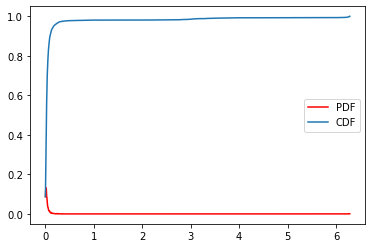

In [21]:
distribution_plot(mdphis)

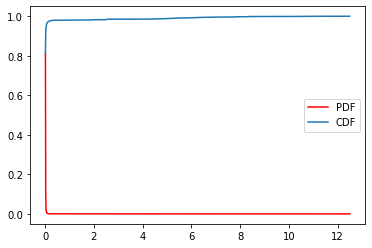

In [22]:
distribution_plot(mdphi_slopes)

In [23]:
print('threshold \t coverage_track_rate')
for threshold in np.arange(0.01, 0.11, 0.01):
    print(np.round(threshold,2), '\t\t', np.round(np.mean(mdphi_slopes<threshold),2))

# threshold 	 coverage_track_rate
# 0.01 		 0.7
# 0.02 		 0.88
# 0.03 		 0.92
# 0.04 		 0.94
# 0.05 		 0.95
# 0.06 		 0.96
# 0.07 		 0.96
# 0.08 		 0.96
# 0.09 		 0.96
# 0.1 		 0.97

threshold 	 coverage_track_rate
0.01 		 0.73
0.02 		 0.89
0.03 		 0.93
0.04 		 0.95
0.05 		 0.95
0.06 		 0.96
0.07 		 0.96
0.08 		 0.97
0.09 		 0.97
0.1 		 0.97


## Plot a hit npz file

In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [39]:
def load_graph(file):
    with np.load(file, allow_pickle=True) as f:
        # print(list(f.keys()))
        hits = f['hits']
        scaled_hits = f['scaled_hits']
        hits_xyz = f['hits_xyz']
        noise_label = f['noise_label']
        layer_id = f['layer_id']
        edge_index = f['edge_index']
        pid = f['pid']
        n_hits = f['n_hits']
        n_tracks =f ['n_tracks']
        trigger_flag = f['trigger']
        ip = f['ip']
        psv = f['psv'] # secondary vertex
        p_momentum = f['p_momentum']
        is_complete_trk = f['is_complete_trk']
        # ParentTypeID = f['ParentTypeID']
        # e = f['e']
    return hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum, is_complete_trk# , # ParentTypeID #, e

In [47]:
# input_dir = 'data/tracking_inference_output/non-trigger'
input_dir = '/ssd2/tingting/HFMLNewFiles-old-parsed-hits/trigger/1'
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('event')])

In [48]:
index = 2

In [50]:
# filename = 'data/parsed/trigger/event100002001.npz'
filename = filenames[index]
figure(figsize=(8, 6), dpi=80)
hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum, is_complete_trk = load_graph(filename)
AXISI, AXISII = 0, 1
x, y = hits_xyz[:, AXISI], hits_xyz[:, AXISII]
start, end = edge_index
# label_e = np.logical_and(pid[start] != -1, pid[start] == pid[end])
# print('acc: ', str(np.mean(label_e==(e.reshape(-1)>0.5))))

<Figure size 640x480 with 0 Axes>

In [52]:
print(pid)

[-1 44 43 -1 -1 -1 -1 -1 -1 -1 48 11 12  1 47 33 46 39  3  4 -1 44 -1 -1
 -1 43 48 11 12  1 47 33 46 39  3  4 44 -1 -1 43 48 11 12 11  1 47 33 46
 39  3  4 43  1 33  4 47 48 11 12 -1 -1 -1 44 46  3 46  4 47 39 43 48 33
  3 11 -1 12 -1]


/tmp/ipykernel_3016767/3149349883.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  c = color_list[label_e[i]]


Text(0.5, 1.0, 'gt track id (all hits)')

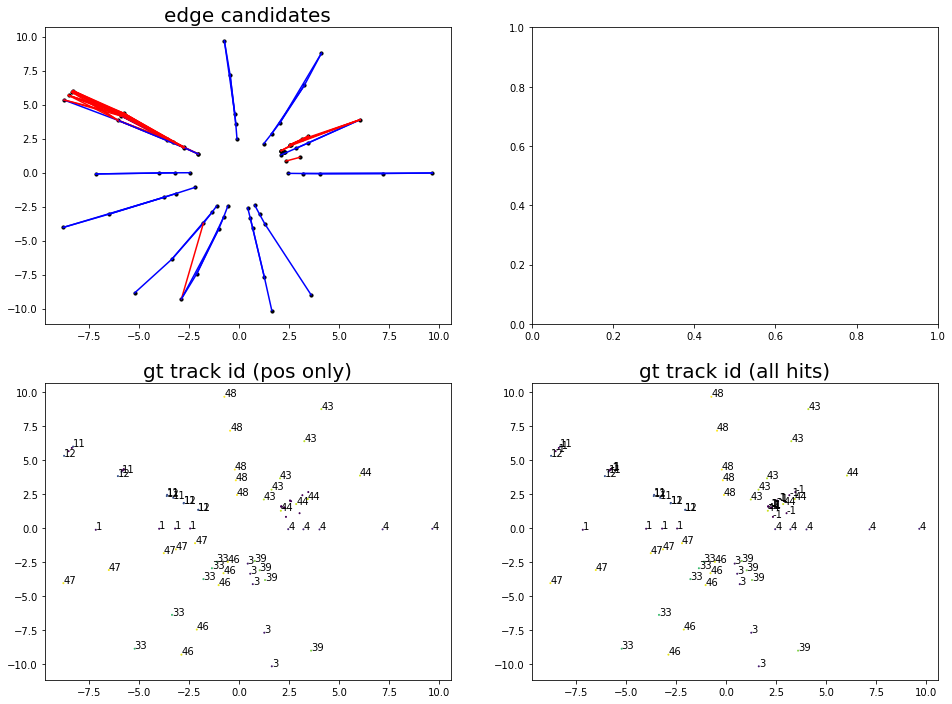

In [51]:
#figure(figsize=(20, 16), dpi=200)
fig, axs = plt.subplots(2, 2, figsize=(16,12))

color_list = ['r', 'b']

axs[0, 0].scatter(x, y, s=10, c='k')
label_e = np.logical_and(pid[start] != -1, pid[start] == pid[end])
for i in range(edge_index.shape[1]):
    c = color_list[label_e[i]]
    axs[0, 0].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
                    [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=c)
axs[0, 0].set_title('edge candidates', fontsize=20)

# plot all track
# axs[0, 0].scatter(x, y, s=10, c='k')
# for i in range(edge_index.shape[1]):
#     c = color_list[label_e[i]]
#     axs[0, 0].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
#                     [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=c)
# axs[0, 0].set_title('edge candidates', fontsize=20)

# axs[0, 1].scatter(x, y, s=10, c='k')
# for i in range(edge_index.shape[1]):
#     if e[i] > 0.5:
#         if (e[i]> 0.5) == label_e[i]:
#             c = 'b'
#         else:
#             c = 'r'
#         axs[0, 1].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
#                     [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=b)
# axs[0, 1].set_title('predicted edges', fontsize=20)

axs[1, 0].scatter(x, y, s=1, c=pid)
for i in range(hits.shape[0]):
    if pid[i] > 0:
        axs[1, 0].annotate(int(pid[i]), (x[i], y[i]))
axs[1, 0].set_title('gt track id (pos only)', fontsize=20)

axs[1, 1].scatter(x, y, s=1, c=pid)
for i in range(hits.shape[0]):
    axs[1, 1].annotate(int(pid[i]), (x[i], y[i]))
axs[1, 1].set_title('gt track id (all hits)', fontsize=20)

# tp = np.sum(np.logical_and(label_e, (e.reshape(-1)>0.5)))
# fp = np.sum(np.logical_and(label_e==False, (e.reshape(-1)>0.5)))
# fn = np.sum(np.logical_and(label_e, (e.reshape(-1)<=0.5)))
# tn = np.sum(np.logical_and(label_e==False, (e.reshape(-1)<=0.5)))
# fig.suptitle(filename + ' Acc: ' + str(np.round(np.mean((label_e==(e.reshape(-1)>0.5))), 2)) + '\n' + f'recall: {np.round(tp/(tp+fn),2)} precision: {np.round(tp/(tp+fp),2)}', fontsize=20)

In [14]:
tp = np.sum(np.logical_and(label_e, (e.reshape(-1)>0.5)))
fp = np.sum(np.logical_and(label_e==False, (e.reshape(-1)>0.5)))
fn = np.sum(np.logical_and(label_e, (e.reshape(-1)<=0.5)))
tn = np.sum(np.logical_and(label_e==False, (e.reshape(-1)<=0.5)))
print(tp, fp, fn, tn, sum([tp, fp, fn, tn]), label_e.shape[0])
print(f'recall: {np.round(tp/(tp+fn),2)} precision: {np.round(tp/(tp+fp),2)}')

NameError: name 'label_e' is not defined

In [5]:
def plot_npz_file(filename, plot_psv):
    hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum, e = load_graph(filename)
    AXISI, AXISII = 0, 1
    x, y = hits_xyz[:, AXISI], hits_xyz[:, AXISII]
    start, end = edge_index
    label_e = np.logical_and(pid[start] != -1, pid[start] == pid[end])
    print('acc: ', str(np.mean(label_e==(e.reshape(-1)>0.5))))
    fig, axs = plt.subplots(2, 2, figsize=(16,12))

    color_list = ['r', 'b']
    # plot all track
    axs[0, 0].scatter(x, y, s=10, c='k')
    for i in range(edge_index.shape[1]):
        c = color_list[label_e[i]]
        axs[0, 0].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
                        [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=c)
    axs[0, 0].set_title('edge candidates', fontsize=20)

    axs[0, 1].scatter(x, y, s=10, c='k')
    for i in range(edge_index.shape[1]):
        if e[i] > 0.5:
            if (e[i]> 0.5) == label_e[i]:
                c = 'b'
            else:
                c = 'r'
            axs[0, 1].plot([x[edge_index[0,i]],x[edge_index[1,i]]],
                        [y[edge_index[0,i]],y[edge_index[1,i]]], '-', c=c)
    axs[0, 1].set_title('predicted edges', fontsize=20)

    axs[1, 0].scatter(x, y, s=1, c=pid)
    axs[1, 0].scatter(ip[AXISI], ip[AXISII], s=10, c='r')
    if plot_psv:
        mask = [np.logical_and((psv[i] != ip).all(), (psv!=None).all()) for i in range(len(psv))]
        different_psv = set([tuple(psv) for psv in psv[mask]])
        for psv in different_psv:
            axs[1, 0].scatter(psv[AXISI], psv[AXISII], s=10, c='b')
    for i in range(hits.shape[0]):
        if pid[i] > 0:
            axs[1, 0].annotate(int(pid[i]), (x[i], y[i]))
    axs[1, 0].set_title('gt track id (pos only)', fontsize=20)

    axs[1, 1].scatter(x, y, s=1, c=pid)
    for i in range(hits.shape[0]):
        axs[1, 1].annotate(int(pid[i]), (x[i], y[i]))
    axs[1, 1].set_title('gt track id (all hits)', fontsize=20)

    tp = np.sum(np.logical_and(label_e, (e.reshape(-1)>0.5)))
    fp = np.sum(np.logical_and(label_e==False, (e.reshape(-1)>0.5)))
    fn = np.sum(np.logical_and(label_e, (e.reshape(-1)<=0.5)))
    tn = np.sum(np.logical_and(label_e==False, (e.reshape(-1)<=0.5)))
    fig.suptitle(filename + ' Acc: ' + str(np.round(np.mean((label_e==(e.reshape(-1)>0.5))), 2)) + '\n' + f'recall: {np.round(tp/(tp+fn),2)} precision: {np.round(tp/(tp+fp),2)}', fontsize=20)

## Check Track Origin

In [7]:
from icecream import ic

In [6]:
def get_distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    d = np.sqrt(np.sum(np.square(x1 - x2)))
    return d

In [11]:
input_dir = 'data/tracking_inference_output/trigger'
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('event')])
for filename in filenames[:100]:
    hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum, e = load_graph(filename)
    mask = [np.logical_and((psv[i] != ip).all(), (psv!=None).all()) for i in range(len(psv))]
    if sum(mask)!= 0:
        different_psv = [tuple(psv) for psv in psv[mask]]
        distance = [get_distance(psv, ip) for psv in set(different_psv)]
        ic(filename, ip, set(different_psv), distance)


ic| filename: 'data/tracking_inference_output/trigger/event100002001.npz'
    ip: array([-0.01222057,  0.01235588, -1.85050661])
    set(different_psv): {(-1.1335796860098868, 2.186141712961005, -3.827685659968494),
                         (-0.01302987675498334, -0.019249609907477365, -1.8234001205816497),
                         (2.3018371025393725, -2.390163996598478, 6.745464755699859),
                         (8.055985742646829, 15.090035869892262, -4.263800068312517)}
    distance: [9.220503698580444, 0.04164521558592026, 3.145159469486202, 17.27010052873222]
ic| filename: 'data/tracking_inference_output/trigger/event100002004.npz'
    ip: array([-0.00723936,  0.00549478,  1.91563735])
    set(different_psv): {(-2.917670269105288, 1.3822758599865308, 3.8990812168778795),
                         (-0.028868441730121052, 0.02550516171205932, 1.8662587557389023),
                         (0.04108129333415252, -0.006461766073091693, 1.9230285066879813)}
    distance: [0.05750198207

In [12]:
input_dir = '../Data/tracking_inference_INTTclustered/trigger'
filenames = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('event')])

acc:  0.9777777777777777


/tmp/ipykernel_14409/534791511.py:14: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  c = color_list[label_e[i]]


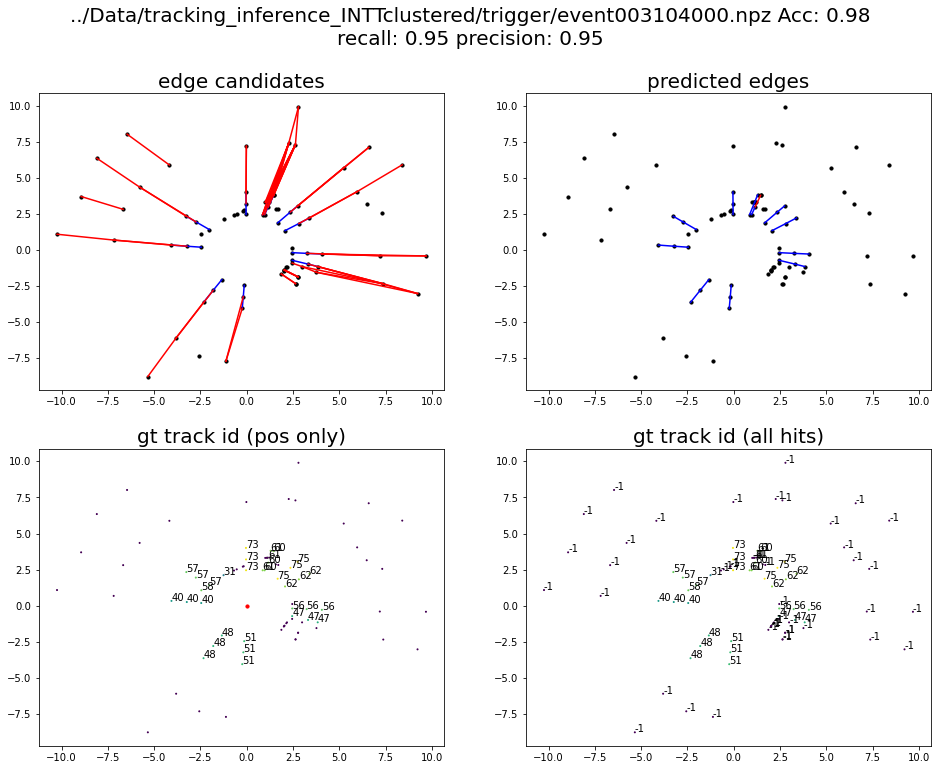

In [14]:
# plot_npz_file('data/tracking_inference_output/trigger/event100002002.npz', plot_psv=True)
plot_npz_file(filenames[0], plot_psv=True)

In [47]:
filename = 'data/tracking_inference_output/trigger/event100002002.npz'
hits, scaled_hits, hits_xyz, noise_label, layer_id, edge_index, pid, n_hits, n_tracks, trigger_flag, ip, psv, p_momentum, e = load_graph(filename)
mask = [np.logical_and((psv[i] != ip).all(), (psv!=None).all()) for i in range(len(psv))]
print(sum(mask))
print(psv)

0
[list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.013108137481787147, -0.008449455325186248, -11.250896716795383])
 None
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 None
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.249133544995107])
 list([0.01384526763227765, -0.0099599788528956, -11.2491335